<a href="https://colab.research.google.com/github/krcpr007/iris_encryption-/blob/main/Eye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
from PIL import Image
import os
import numpy as np
image_folder = '/content/gdrive/MyDrive/iris/train/eye'
images = []
for filename in os.listdir(image_folder):
    img = Image.open(os.path.join(image_folder, filename)).convert('L') # convert to grayscale
    img = img.resize((64, 64)) # resize image to 64x64 pixels
    images.append(img)

In [ ]:
print(images)

In [ ]:
from sklearn.preprocessing import StandardScaler

# convert images to numpy arrays
X = []
for img in images:
    X.append(np.array(img).flatten())
X = np.array(X)

# normalize dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
import keras
# define CNN model
model = models.Sequential([
    layers.Reshape((64, 64, 1), input_shape=(4096,)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model
y = np.array([0] * 50 + [1] * 50 + [2] * 50) # set target labels
y_onehot = tf.one_hot(y, depth=3) # one-hot encode target labels
X_normalized = X_normalized[:150] # taking only 150
model.fit(X_normalized, y_onehot, epochs=10) #model fit
# print('Number of images loaded:', len(X_normalized)) #328
# print('Number of labels:', y_onehot.shape[0])  #150
# keras.utils.plot_model(model, show_shapes=True)
test_loss, test_acc = model.evaluate(X_normalized, y_onehot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 78ms/step - loss: 1.0991 - accuracy: 0.3467
Test loss: 1.0990749597549438
Test accuracy: 0.3466666638851166


In [ ]:
# extract feature vector V1
V1 = model.predict(X_normalized)
# print(V1.shape)
print(V1.flatten())

5/5 [==============================] - 0s 42ms/step
[0.3059658  0.3430157  0.35101864 0.32250106 0.31464565 0.36285317
 0.29938537 0.33485454 0.3657601  0.3077645  0.32563764 0.36659777
 0.30063197 0.28687906 0.41248897 0.32054013 0.2992899  0.38016996
 0.3097564  0.3176699  0.37257373 0.35060856 0.30473655 0.34465486
 0.320456   0.3528013  0.32674268 0.3501     0.30983347 0.34006652
 0.31081235 0.29670748 0.39248016 0.32263142 0.3496331  0.32773542
 0.31437626 0.33655727 0.34906647 0.32228288 0.33193022 0.345787
 0.32162157 0.33533794 0.34304053 0.29700732 0.3341986  0.36879408
 0.33733323 0.35261407 0.31005266 0.30407324 0.33600682 0.3599199
 0.32684228 0.30969712 0.36346063 0.33460584 0.30326468 0.36212942
 0.3128649  0.35208797 0.33504716 0.32867894 0.33887106 0.33244997
 0.31305188 0.3379925  0.34895572 0.3099953  0.33489862 0.35510606
 0.31124613 0.35226578 0.33648804 0.32012615 0.34789485 0.33197904
 0.314665   0.32190302 0.36343208 0.2977313  0.3393835  0.36288515
 0.31644496 0

In [ ]:
# !pip install bchlib
import bchlib
# create a bch object
BCH_POLYNOMIAL = 8219
BCH_BITS = 72
bch = bchlib.BCH(BCH_POLYNOMIAL, BCH_BITS)
v_encoded = bch.encode(V1.flatten())
print(v_encoded)

bytearray(b'\xd4\xaa\xe8\xe8\xcem\xbd\x8b\xf2\x06\xfb\xd0\t5)\xa5ZOE\xb4\xa8\x14\xa3\xf6\x8b*I\xc1\xd5\x84\xf8u\xeeu\xb0\xaf\xb4\xb4\x0e.G\xf9>NF\xf9\xa1\x19]\x84\xfe\xd5\x89\x19\x96\x80\xf5i]&\xb7D\x7f\xedG\xc8\x8d\xc1\x8d\x86o\x18\x1a\x8e\xcdD\xdd;\xa6\xfb!\xf4\xc7\xb1\xae\xf4\x18\x03y\x03V\xb5q\xd9\xdf\xb6\xc8\xecT\xe0\xa1A\x12\x03\x9c\x8ak\xd4\xc1o\x05X\xc0\r\x15\x80\x00')


In [ ]:
!pip install reedsolo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from reedsolo import RSCodec

# encode feature vector V using RS code
rs = RSCodec(10)
V_encoded = rs.encode(V1.flatten())
print(V_encoded)

bytearray(b'\x8d\xa7\x9c>\xc1\x9f\xaf>\xb7\xb8\xb3>\xdc\x1e\xa5><\x19\xa1>\xe4\xc7\xb9>\nI\x99>\x0er\xab>\xe8D\xbb>O\x93\x9d>\xfa\xb9\xa6>\xb4\xb2\xbb>o\xec\x99>\xd0\xe1\x92>\xc11\xd3>\xd6\x1d\xa4>\x87<\x99>\xa3\xa5\xc2>d\x98\x9e>\xa1\xa5\xa2>\xfc\xc1\xbe>\xf7\x82\xb3>n\x06\x9c>\x9av\xb0>\xcf\x12\xa4>_\xa2\xb4>\xd1J\xa7>O@\xb3>~\xa2\x9e>3\x1d\xae>\xcc"\x9f>\x0b\xea\x97>)\xf3\xc8>\xf2/\xa5>\x1c\x03\xb3>\xf0\xcc\xa7>\xed\xf5\xa0><Q\xac>\xd7\xb8\xb2>C\x02\xa5>\xc2\xf2\xa9>\xfe\n\xb1>\x95\xab\xa4>j\xb1\xab>\x02\xa3\xaf>X\x11\x98>\x14\x1c\xab>\x94\xd2\xbc>\xf1\xb6\xac>\xd5\x89\xb4>9\xbf\x9e>}\xaf\x9b>\x16\t\xac>lG\xb8>\xdfW\xa7>\x9f\x90\x9e>\x83\x17\xba>uQ\xab>\x82E\x9b>\x07i\xb9>\xd4/\xa0>\xe0D\xb4>M\x8b\xab>\x9bH\xa8>\x82\x80\xad>\xe26\xaa>VH\xa0>Z\r\xad>S\xaa\xb2>\xb4\xb7\x9e>\xd5w\xab>v\xd0\xb5>\xa7[\x9f>.\\\xb4>)H\xac>\x93\xe7\xa3>F\x1f\xb2>(\xf9\xa9>\xc5\x1b\xa1>y\xd0\xa4>\xc5\x13\xba>=p\x98>\xad\xc3\xad>\x15\xcc\xb9>\x13\x05\xa2>\x08l\xb3>\xe4\x8e\xaa>\xaa\x11\xa7>\xdc\x85\xa7>wh\xb1

In [ ]:
!pip install  pyturbo
from pyturbo import TurboEncoder

# encode feature vector V using Turbo code
encoder = TurboEncoder()
V_encoded = encoder.encode(V1.flatten())
print(V_encoded)


In [ ]:
# encrypt image using XOR operation
img = Image.open(os.path.join(image_folder, '1-543.JPG')).convert('L') # load example image
img = img.resize((64, 64)) # resize image to 64x64 pixels
X = np.array(img).flatten() # convert image to numpy array
X_normalized = scaler.transform(X.reshape(1, -1)) # normalize image

V2 = model.predict(X_normalized) # extract feature vector V2
V_encoded = rs.encode(V2.flatten()) # encode feature vector V2 using RS code
# v_encoded = bch.encode(V1.flatten()) # encode feature vector v2 using bch code
key = V_encoded
print(key)

1/1 [==============================] - 0s 102ms/step
bytearray(b'\nI\x99>\x0er\xab>\xe8D\xbb>1\xbd`\xf6\x9fs\x9c\xa6\x86n')


In [ ]:
import numpy as np
from scipy.stats import chisquare
import math
import matplotlib.pyplot as plt
from scipy import stats
# converting key into binary
binary_key = ''.join(format(byte, '08b') for byte in key)
print(binary_key)


10101111110111100101010100111111001011001110110111001110001110111110000000001101001000100011111000011101100101101101000101100101110101101010010111100011000110110001001101111001


Entropy: 0.9985090989176322


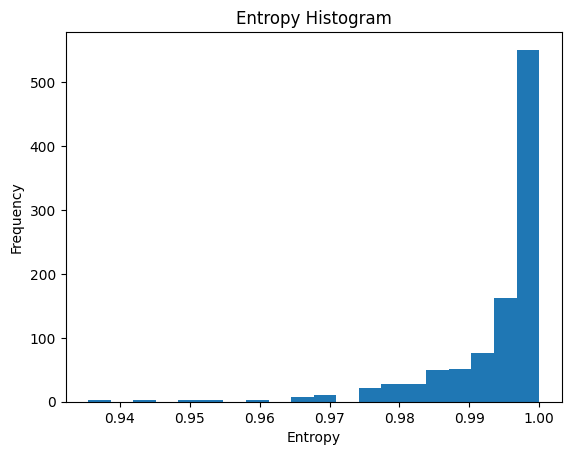

In [ ]:
import math
import random
import matplotlib.pyplot as plt
def entropy_test(key):
    # Convert key to binary string
    binary_key = ''.join(format(byte, '08b') for byte in key)

    # Count the number of 0's and 1's
    num_zeros = binary_key.count('0')
    num_ones = binary_key.count('1')

    # Compute the total number of bits
    total_bits = len(binary_key)

    # Compute the probability of 0's and 1's
    p_zero = num_zeros / total_bits
    p_one = num_ones / total_bits

    # Compute the entropy
    entropy = -(p_zero * math.log2(p_zero) + p_one * math.log2(p_one))

    return entropy
entropy = entropy_test(key)
print("Entropy:", entropy)
# Generate keys and calculate their entropy values
num_keys = 1000
key_length = 16
keys = [bytes(random.getrandbits(8) for _ in range(key_length)) for _ in range(num_keys)]
entropies = [entropy_test(key) for key in keys]

# Plot the entropy values
plt.hist(entropies, bins=20)
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Entropy Histogram')
plt.show()

<ipython-input-24-788c83775ab0>:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  autocorr = np.correlate(np.fromstring(binary_key, 'u1') - ord('0'), np.fromstring(binary_key, 'u1') - ord('0'), mode='full')


Correlation test p-value: 8.117154957640179e-107


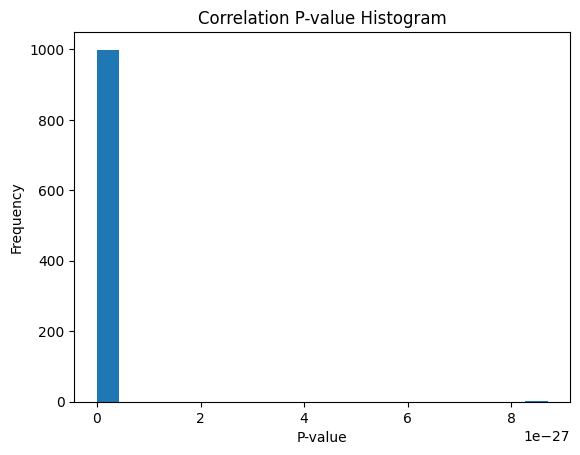

In [ ]:
from scipy.stats import pearsonr
# correlation test
def correlation_test(key):
    # Convert key to binary string
    binary_key = ''.join(format(byte, '08b') for byte in key)

    # Compute the autocorrelation function
    autocorr = np.correlate(np.fromstring(binary_key, 'u1') - ord('0'), np.fromstring(binary_key, 'u1') - ord('0'), mode='full')
    autocorr = autocorr[len(binary_key)-1:]

    # Compute the correlation coefficient and p-value
    corr_coef, p_value = pearsonr(autocorr, range(1, len(autocorr) + 1))

    return p_value
p_value = correlation_test(key)
print("Correlation test p-value:", p_value)
# Generate keys and calculate their correlation p-values
num_keys = 1000
key_length = 16
keys = [bytes(random.getrandbits(8) for _ in range(key_length)) for _ in range(num_keys)]
p_values = [correlation_test(key) for key in keys]
# Plot the correlation p-values
plt.hist(p_values, bins=20)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Correlation P-value Histogram')
plt.show()

In [ ]:
img = Image.open(os.path.join(image_folder, '1-543.JPG')).convert('L') # load example image
img = img.resize((64, 64)) # resize image to 64x64 pixels
X = np.array(img).flatten() # convert image to numpy array

# reshape key to match the shape of X
key_reshaped = np.tile(key, len(X) // len(key) + 1)[:len(X)]

# encrypt the image using XOR operation
X_encrypted = bytearray(X ^ key_reshaped)
save_encrypted_img_folder = "/content/gdrive/MyDrive/Encrypted_Images"
# save the encrypted image
img_encrypted = Image.frombytes('L', (64, 64), bytes(X_encrypted))
img_encrypted.save(os.path.join(save_encrypted_img_folder, 'RS.jpg'))


In [ ]:
import numpy as np
from PIL import Image
image_folder = '/content/gdrive/MyDrive/iris/train/eye'
save_encrypted_img_folder = "/content/gdrive/MyDrive/Encrypted_Images"
# Load the original and encrypted images
original_image = Image.open(os.path.join(image_folder, '1-543.JPG'))
encrypted_image = Image.open(os.path.join(save_encrypted_img_folder, 'RS.jpg'))
original_image = original_image.resize((64, 64))
# Convert the images to grayscale
original_image = original_image.convert('L')
encrypted_image = encrypted_image.convert('L')

# Convert the images to numpy arrays for faster processing
original_array = np.array(original_image)
encrypted_array = np.array(encrypted_image)

# Calculate the number of pixels in the image
N = original_array.size

# Calculate the number of pixels that have changed between the original and encrypted images
diff_array = np.abs(original_array - encrypted_array)
Nc = np.count_nonzero(diff_array)

# Calculate NPCR
NPCR = (Nc/N) * 100

print('NPCR: {:.2f}%'.format(NPCR))
# bch->99.78
# RS ->99.61

NPCR: 99.61%


In [ ]:
import cv2
image_folder = '/content/gdrive/MyDrive/iris/train/eye'
save_encrypted_img_folder = "/content/gdrive/MyDrive/Encrypted_Images"
encrypted_image1 = np.array(Image.open(os.path.join(save_encrypted_img_folder, 'BCH.jpg')))
encrypted_image2 = np.array(Image.open(os.path.join(save_encrypted_img_folder, 'RS.jpg')))

# Compute the absolute difference between the two images
diff = cv2.absdiff(encrypted_image1, encrypted_image2)

# Compute the mean intensity value of the difference image
mean_intensity = np.sum(diff) / (diff.shape[0] * diff.shape[1])

# Compute the UACI value as a percentage
uaci = (mean_intensity / 255) * 100

# Print the UACI value
print("UACI is: %.2f%%" % uaci)
# UACI is: 27.39%

UACI is: 27.39%
